Randomized Optimization:

Part 1, 8 Queens



In [1]:
!pip install mlrose-hiive

     |████████████████████████████████| 51kB 6.0MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-cp37-none-any.whl size=98351 sha256=62595665da78537c34ab3e7bde729681d23cdd2e4acc786950a1d8378280461a
  Stored in directory: /root/.cache/pip/wheels/7c/42/31/77944bb5cb941be07e4a96e0c112ae32c8d27017c5f31459de
Successfully built mlrose-hiive


In [2]:

import mlrose_hiive as ml
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [3]:
import matplotlib.pyplot as plt
def generatePlot(df_graph,temps):
  for temp in temps:
    temp_df = df_graph[df_graph.Temperature == temp]
    plt.plot(temp_df['Iteration'],temp_df['Fitness'],label='Fitness with temperature:'+str(temp))
    #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  plt.ylabel('Fitness')
  plt.xlabel("Iteration")
  plt.legend()
  
  

In [4]:
def generatePlotrhc(df_graph,temps):
  for temp in temps:
    temp_df = df_graph[df_graph.Restarts == temp]
    plt.plot(temp_df['Iteration'],temp_df['Fitness'],label='Fitness with Restarts:'+str(temp))
    #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  plt.ylabel('Fitness')
  plt.xlabel("Iteration")
  plt.legend()

In [3]:


coords_list = [(1,1),(2,5),(3,7),(9,9),(8,1),(4,4),(5,9),(7,3)]
fit = ml.TravellingSales(coords=coords_list)
problem = ml.TSPOpt(length = 8,fitness_fn=fit,maximize=True)
print(problem)

In [60]:
SEED = 5
OUTPUT_DIRECTORY = 'test'
experiment_name = 'fourpeaks_experiment'
problem = ml.ContinuousPeaksGenerator.generate(SEED,40,.2)
rhc = ml.SARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(15),
                max_attempts=500,
                temperature_list=[1,10,50,100])   
# the two data frames will contain the results
df_run_stats, df_run_curves = rhc.run() 


In [8]:
import pandas as pd


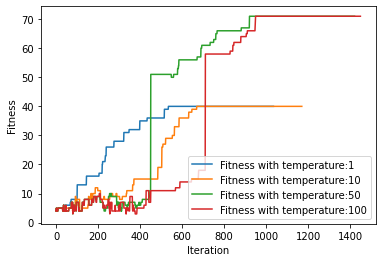

In [61]:


df_temp = df_run_curves['Temperature'].astype(str).astype(int)
df_run_curves['Temperature'] = df_temp
generatePlot(df_run_curves,[1,10,50,100])


In [ ]:
SEED = 5
OUTPUT_DIRECTORY = 'test'
experiment_name = 'rhc_experiment'
problem = ml.ContinuousPeaksGenerator.generate(SEED,40,.2)
rhc = ml.RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(10),
                max_attempts=1000,
                restart_list=[25, 75, 100])   
# the two data frames will contain the results
df_run_stats, df_run_curves = rhc.run() 

     Iteration      Time  Fitness  FEvals  Restarts  max_iters  current_restart
0            0  0.000345      4.0     0.0        50        512                0
1            1  0.008101      4.0     1.0        50        512                0
2            1  0.008101      6.0     2.0        50        512                1
3            1  0.008101      4.0     3.0        50        512                2
4            1  0.008101      4.0     5.0        50        512                3
..         ...       ...      ...     ...       ...        ...              ...
401          1  0.008101      6.0   275.0       250        512              246
402          1  0.008101      9.0   276.0       250        512              247
403          1  0.008101      6.0   278.0       250        512              248
404          1  0.008101      4.0   279.0       250        512              249
405          1  0.008101      6.0   280.0       250        512              250

[406 rows x 7 columns]


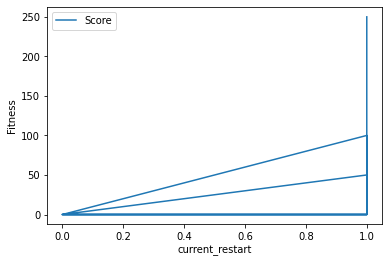

In [74]:
generatePlot(df_run_curves)
print(df_run_curves.dtypes)

In [ ]:
def queens_max(state):
  fitness_cnt = 0
  for i in range(len(state)-1):
    for j in range(i+1,len(state)):
      if (state[j]!= state[i]) and (state[j]!=state[i]+(j-i)) and (state[j]!=state[i]-(j-i)):
        fitness_cnt +=1
  return fitness_cnt
cust_fit = ml.CustomFitness(queens_max)

the fitness curve is the fitness score, and the number of fitness evals run


In [ ]:

schedule = ml.ExpDecay()
init_state = np.array([0,1,2,3,4,5,6,7])
best_state, best_fitness, fitness_curve = ml.random_hill_climb(problem,max_attempts=15,max_iters=5000,restarts=50,init_state=init_state,curve=True,random_state=5)
print(best_state)
print(best_fitness)
print(fitness_curve)

[5 2 7 1 4 6 0 3]
57.28845123389017
[[ 43.49411683 253.        ]
 [ 43.51463237 255.        ]
 [ 49.08881407 257.        ]
 [ 49.08881407 258.        ]
 [ 49.08881407 259.        ]
 [ 51.40823936 261.        ]
 [ 51.40823936 263.        ]
 [ 51.40823936 264.        ]
 [ 51.40823936 265.        ]
 [ 51.40823936 266.        ]
 [ 51.40823936 267.        ]
 [ 51.40823936 268.        ]
 [ 51.40823936 269.        ]
 [ 51.40823936 270.        ]
 [ 51.40823936 271.        ]
 [ 51.40823936 272.        ]
 [ 51.40823936 273.        ]
 [ 51.40823936 274.        ]
 [ 51.40823936 275.        ]
 [ 51.40823936 276.        ]
 [ 55.71651064 278.        ]
 [ 55.71651064 279.        ]
 [ 55.71651064 280.        ]
 [ 55.71651064 281.        ]
 [ 55.71651064 282.        ]
 [ 55.71651064 283.        ]
 [ 56.96138868 285.        ]
 [ 57.28845123 287.        ]
 [ 57.28845123 288.        ]
 [ 57.28845123 289.        ]
 [ 57.28845123 290.        ]
 [ 57.28845123 291.        ]
 [ 57.28845123 292.        ]
 [ 57.2

In [ ]:

schedule = ml.ExpDecay()
init_state = np.array([0,1,2,3,4,5,6,7])
best_state, best_fitness, fitness_curve = ml.simulated_annealing(problem,schedule=schedule,max_attempts=15,max_iters=5000,init_state=init_state,curve=True,random_state=5,fevals=True)
print(best_state)
print(best_fitness)
print(fitness_curve)

[3 1 4 2 7 5 6 0]
57.259741807370645
[[  43.14708546 2081.        ]
 [  43.14708546 2082.        ]
 [  43.16760101 2084.        ]
 [  50.20773295 2086.        ]
 [  49.52010803 2088.        ]
 [  49.52010803 2089.        ]
 [  50.24844307 2091.        ]
 [  50.24844307 2092.        ]
 [  50.24844307 2093.        ]
 [  51.78779664 2095.        ]
 [  51.78779664 2096.        ]
 [  51.78779664 2097.        ]
 [  52.85005438 2099.        ]
 [  52.85005438 2100.        ]
 [  52.85005438 2101.        ]
 [  52.85005438 2102.        ]
 [  52.85005438 2103.        ]
 [  52.85005438 2104.        ]
 [  52.85005438 2105.        ]
 [  55.70123697 2107.        ]
 [  55.70123697 2108.        ]
 [  55.70123697 2109.        ]
 [  55.70123697 2110.        ]
 [  55.70123697 2111.        ]
 [  55.70123697 2112.        ]
 [  55.70123697 2113.        ]
 [  55.70123697 2114.        ]
 [  55.70123697 2115.        ]
 [  54.9920532  2117.        ]
 [  55.37377929 2119.        ]
 [  55.37377929 2120.        ]
 [

In [ ]:

schedule = ml.ExpDecay()
init_state = np.array([0,1,2,3,4,5,6,7])
best_state, best_fitness, fitness_curve = ml.genetic_alg(problem,pop_size=200,max_attempts=10,curve=True,random_state=5)
print(best_state)
print(best_fitness)
print(fitness_curve)

[0 3 5 2 7 1 4 6]
57.28845123389017
[[  57.28845123  402.        ]
 [  57.28845123  603.        ]
 [  57.28845123  804.        ]
 [  57.28845123 1005.        ]
 [  57.28845123 1206.        ]
 [  57.28845123 1407.        ]
 [  57.28845123 1608.        ]
 [  57.28845123 1809.        ]
 [  57.28845123 2010.        ]
 [  57.28845123 2211.        ]
 [  57.28845123 2412.        ]]


In [ ]:
problem = ml.DiscreteOpt(8,cust_fit,maximize=True,max_val=8)
schedule = ml.ExpDecay()
init_state = np.array([0,1,2,3,4,5,6,7])
best_state, best_fitness, fitness_curve = ml.mimic(problem,pop_size=200,keep_pct=0.2,max_attempts=10,curve=True,random_state=5)
print(best_state)
print(best_fitness)
print(fitness_curve)

[5 2 0 6 0 7 1 4]
27.0
[[  27.  402.]
 [  27.  603.]
 [  27.  804.]
 [  27. 1005.]
 [  27. 1206.]
 [  27. 1407.]
 [  27. 1608.]
 [  27. 1809.]
 [  27. 2010.]
 [  27. 2211.]
 [  27. 2412.]]
